In [2]:
from google.colab import files
print("Please upload your kaggle.json file:")
uploaded = files.upload()




Please upload your kaggle.json file:


Saving kaggle.json to kaggle.json


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!pip install -q kaggle

!kaggle datasets download -d omkargurav/face-mask-dataset


Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 91% 148M/163M [00:00<00:00, 718MB/s] 
100% 163M/163M [00:00<00:00, 679MB/s]


In [4]:
# Step 2: Extract the dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print('The dataset is extracted')

The dataset is extracted


Total images loaded: 2000
X shape: (2000, 224, 224, 3)
y shape: (2000,)
Training set shape: (1600, 224, 224, 3)
Test set shape: (400, 224, 224, 3)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,934,401 (68.41 MB)

 Trainable params: 3,219,713 (12.28 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

50/50 ━━━━━━━━━━━━━━━━━━━━ 1441s 29s/step - accuracy: 0.7634 - loss: 0.6380 - val_accuracy: 0.9525 - val_loss: 0.1340


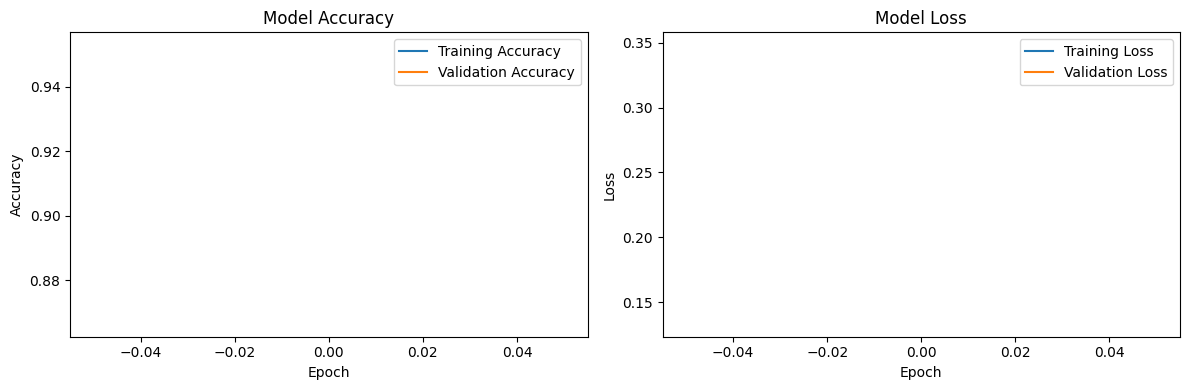

Test Accuracy: 0.9525
Test Loss: 0.1340
13/13 ━━━━━━━━━━━━━━━━━━━━ 279s 21s/step

Classification Report:
              precision    recall  f1-score   support

   With Mask       1.00      0.91      0.95       207
Without Mask       0.91      1.00      0.95       193

    accuracy                           0.95       400
   macro avg       0.96      0.95      0.95       400
weighted avg       0.96      0.95      0.95       400


Confusion Matrix:
[[188  19]
 [  0 193]]
Please upload some test images to the 'test_images' folder

=== Face Mask Detection Model Training Complete ===
Model saved as: /content/face_mask_detection_model.h5

To use the model:
1. For testing on images: Use the test_on_sample_images() function
2. For real-time detection: Use the code in real_time_detection() function in a local environment


In [1]:
import os
import cv2
import numpy as np
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# Step 4: Load and preprocess the data
data = []
categories = ['with_mask', 'without_mask']
limit_per_category = 1000  # Limit per category for balanced dataset

for category in categories:
    path = os.path.join('train', category)
    label = categories.index(category)
    count = 0

    for img_file in os.listdir(path):
        if count >= limit_per_category:
            break
        try:
            img_path = os.path.join(path, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (224, 224))
                data.append([img, label])
                count += 1
        except Exception as e:
            print(f"Error loading {img_file}: {e}")

print("Total images loaded:", len(data))

# Step 5: Shuffle and prepare data
random.shuffle(data)

X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

X = np.array(X)
y = np.array(y)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Normalize pixel values
X = X / 255.0

# Step 6: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Step 7: Create the model using VGG16 transfer learning
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential()

# Add VGG16 layers (excluding the top classification layer)
for layer in vgg.layers:
    model.add(layer)

# Freeze the VGG16 layers
for layer in model.layers:
    layer.trainable = False

# Add custom classification layers
model.add(tf.keras.layers.Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

# Step 8: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 9: Train the model
history = model.fit(X_train, y_train,
                    epochs=1,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)

# Step 10: Save the model
model.save('/content/face_mask_detection_model.h5')

# Step 11: Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Step 12: Define helper functions
def detect_face_mask(img, model):
    """Predict if face has mask or not"""
    img_array = np.expand_dims(img, axis=0)
    prediction = model.predict(img_array)
    return prediction[0][0]

def draw_label(img, text, pos, bg_color):
    """Draw label on image"""
    text_size = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 1, 2)
    end_x = pos[0] + text_size[0][0] + 2
    end_y = pos[1] + text_size[0][1] + 2

    cv2.rectangle(img, pos, (end_x, end_y), bg_color, cv2.FILLED)
    cv2.putText(img, text, pos, cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)

def detect_face(img):
    """Detect faces using Haar Cascade"""
    # Download Haar cascade file if not present
    if not os.path.exists('haarcascade_frontalface_default.xml'):
        !wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

    haar = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    coords = haar.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)
    return coords

# Step 13: Test on sample images
def test_on_sample_images():
    """Test the model on sample images"""
    # Create a test directory if it doesn't exist
    if not os.path.exists('test_images'):
        os.makedirs('test_images')
        print("Please upload some test images to the 'test_images' folder")
        return

    for img_file in os.listdir('test_images'):
        if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join('test_images', img_file)
            img = cv2.imread(img_path)
            if img is not None:
                img_resized = cv2.resize(img, (224, 224))
                img_normalized = img_resized / 255.0

                prediction = detect_face_mask(img_normalized, model)

                # Convert BGR to RGB for display
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                plt.figure(figsize=(8, 6))
                plt.imshow(img_rgb)

                if prediction < 0.5:
                    plt.title(f"With Mask (Confidence: {(1-prediction)*100:.2f}%)", color='green')
                else:
                    plt.title(f"Without Mask (Confidence: {prediction*100:.2f}%)", color='red')

                plt.axis('off')
                plt.show()

# Step 14: Real-time detection (for local environment)
def real_time_detection():
    """
    Real-time face mask detection using webcam
    Note: This won't work in Google Colab, only in local environment
    """
    print("Real-time detection code (works only in local environment):")
    print("""
    cap = cv2.VideoCapture(0)

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Detect faces
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        coords = detect_face(gray)

        for (x, y, w, h) in coords:
            # Extract face region
            face = frame[y:y+h, x:x+w]
            face_resized = cv2.resize(face, (224, 224))
            face_normalized = face_resized / 255.0

            # Predict mask
            prediction = detect_face_mask(face_normalized, model)

            # Draw rectangle around face
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

            # Draw label
            if prediction < 0.5:
                draw_label(frame, "With Mask", (x, y-10), (0, 255, 0))
            else:
                draw_label(frame, "No Mask", (x, y-10), (0, 0, 255))

        cv2.imshow("Face Mask Detection", frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()
    """)

# Step 15: Evaluate model performance
def evaluate_model():
    """Evaluate the model performance"""
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Loss: {test_loss:.4f}")

    # Make predictions on test set
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)

    from sklearn.metrics import classification_report, confusion_matrix

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_binary, target_names=['With Mask', 'Without Mask']))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred_binary)
    print(cm)

# Run evaluation
evaluate_model()

# Test on sample images (if available)
test_on_sample_images()

print("\n=== Face Mask Detection Model Training Complete ===")
print("Model saved as: /content/face_mask_detection_model.h5")
print("\nTo use the model:")
print("1. For testing on images: Use the test_on_sample_images() function")
print("2. For real-time detection: Use the code in real_time_detection() function in a local environment")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


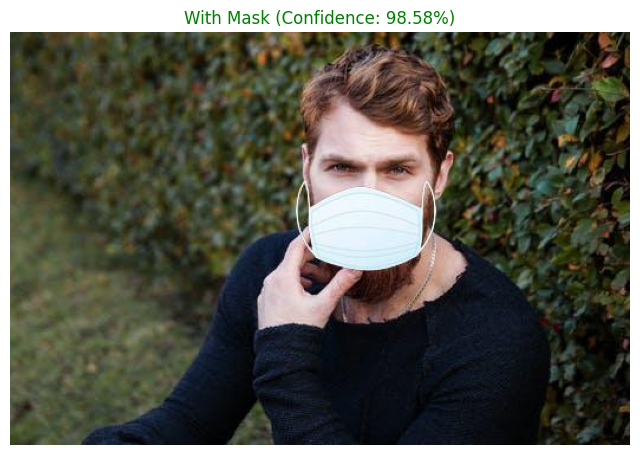

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


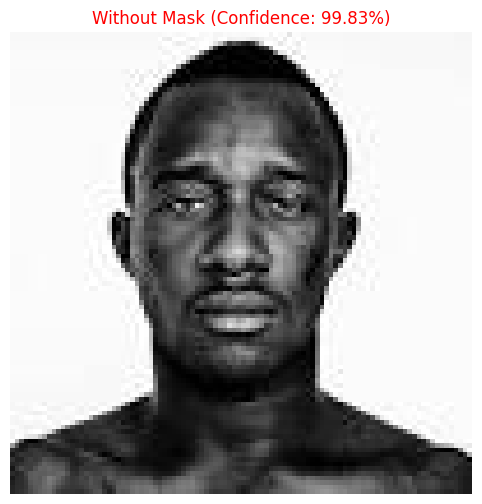

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


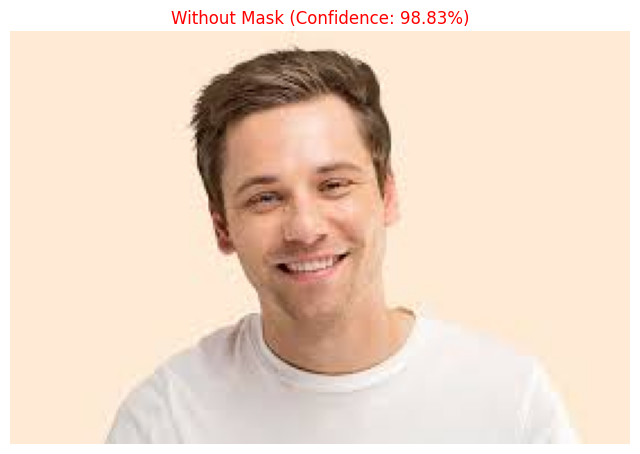

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step


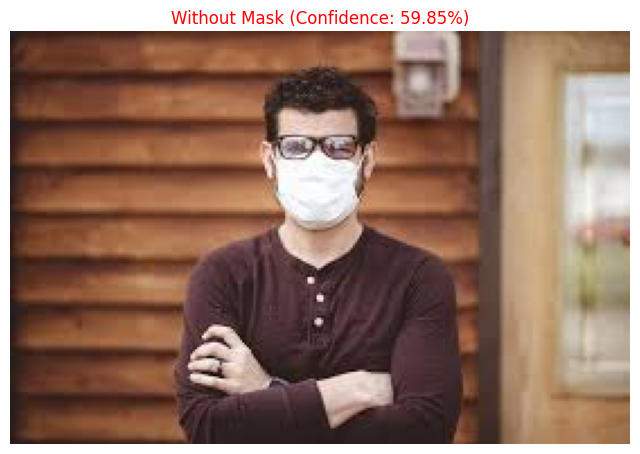

In [7]:
test_on_sample_images()

In [9]:
def predict_image(image_path, model):
    img = cv2.imread(image_path)
    if img is not None:
        img = cv2.resize(img, (224, 224))
        img = img / 255.0
        img_array = np.expand_dims(img, axis=0)
        prediction = model.predict(img_array)[0][0]
        return "With Mask" if prediction < 0.5 else "Without Mask", float(prediction)
    return None, None

result, confidence = predict_image('/content/test_images/without_mask_1.jpg', model)
print(f"Prediction: {result} (Confidence: {confidence:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction: Without Mask (Confidence: 1.00)
